# <b>U.S.-Medical-Insurance-Costs


## Import libraries

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Make a DataFrames

In [432]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

## <b>Exploratory Data Analysis (EDA)

### Inspecting and cleaning data for `observations`

### Data Inspection


In [433]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [434]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


### Missing Values and Duplicates

In [435]:
missing_values = observations.isnull().sum()
duplicates = observations.duplicated().sum()

print("missing_values: \n{ms} \n\nduplicates: {d}".format(ms = missing_values, d = duplicates))


missing_values: 
scientific_name    0
park_name          0
observations       0
dtype: int64 

duplicates: 15


### Drop Duplicates

In [436]:
observations.drop_duplicates(inplace=True)
duplicates = observations.duplicated().sum()

print("duplicates: {0}\n".format(duplicates))


# Reindex the DataFrame
observations.reset_index(drop=True, inplace=True)

observations.info()

duplicates: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23281 entries, 0 to 23280
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 545.8+ KB


## Inspecting and cleaning data for `species_info`

### Data Inspection

In [437]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [438]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### Missing Values and Duplicates

In [439]:
missing_values = species_info.isnull().sum()
duplicates = species_info.duplicated().sum()

print("missing_values: \n{ms} \n\nduplicates: {d}".format(ms = missing_values, d = duplicates))

missing_values: 
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64 

duplicates: 0


### Dealing with Missing Values

The '`conservation_status`' column contains information about the current conservation status of species. For species that are not under the threat of extinction and are in a normal state, we will use the status '`Not Threatened`'.

In [440]:
species_info['conservation_status'].fillna('Not Threatened', inplace=True)

missing_values = species_info.isnull().sum()
print("missing values:\n{0}".format(missing_values))

missing values:
category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


## <b> Numerical summarization

### For `observations`

In [441]:
observations.describe()

,observations
count,23281.000000
mean,142.280357
std,69.885439
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


### For `species_info`

In [442]:
species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Not Threatened
freq,4470,3,7,5633


## <b> Data Visualization

### For `observations`

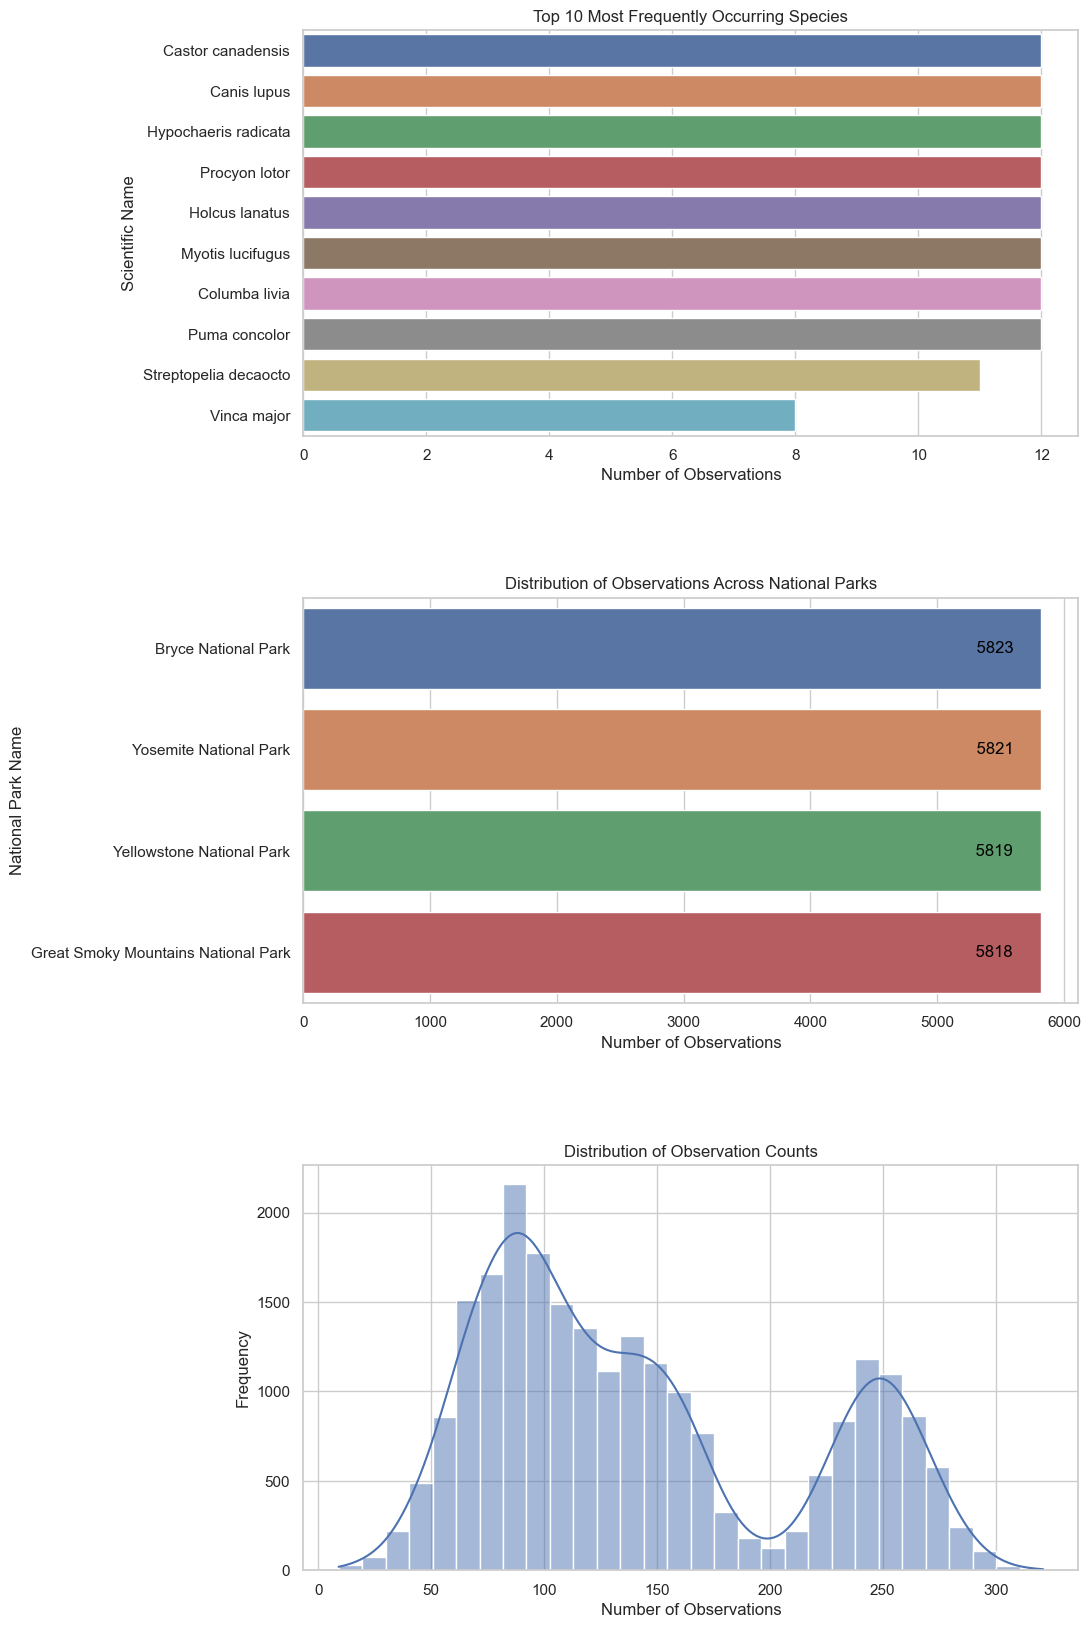

In [443]:
# Creating a figure with three subplots and increased vertical space between them
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# Plot 1: Top 10 Most Frequently Occurring Species
top_species = observations['scientific_name'].value_counts().head(10)

sns.barplot(ax=axes[0], x=top_species.values, y=top_species.index)
axes[0].set_title('Top 10 Most Frequently Occurring Species')
axes[0].set_xlabel('Number of Observations')
axes[0].set_ylabel('Scientific Name')


# Plot 2: Distribution of Observations Across National Parks
park_counts = observations['park_name'].value_counts()
barplot = sns.barplot(ax=axes[1], x=park_counts.values, y=park_counts.index)

for index, value in enumerate(park_counts.values):
    barplot.text(value - 550, index, f' {value}', va='center', color='black')
axes[1].set_title('Distribution of Observations Across National Parks')
axes[1].set_xlabel('Number of Observations')
axes[1].set_ylabel('National Park Name')


# Plot 3: Distribution of Observation Counts
sns.histplot(ax=axes[2], data=observations['observations'], bins=30, kde=True)
axes[2].set_title('Distribution of Observation Counts')
axes[2].set_xlabel('Number of Observations')
axes[2].set_ylabel('Frequency')


# Increasing the space between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()


### For `species_info`

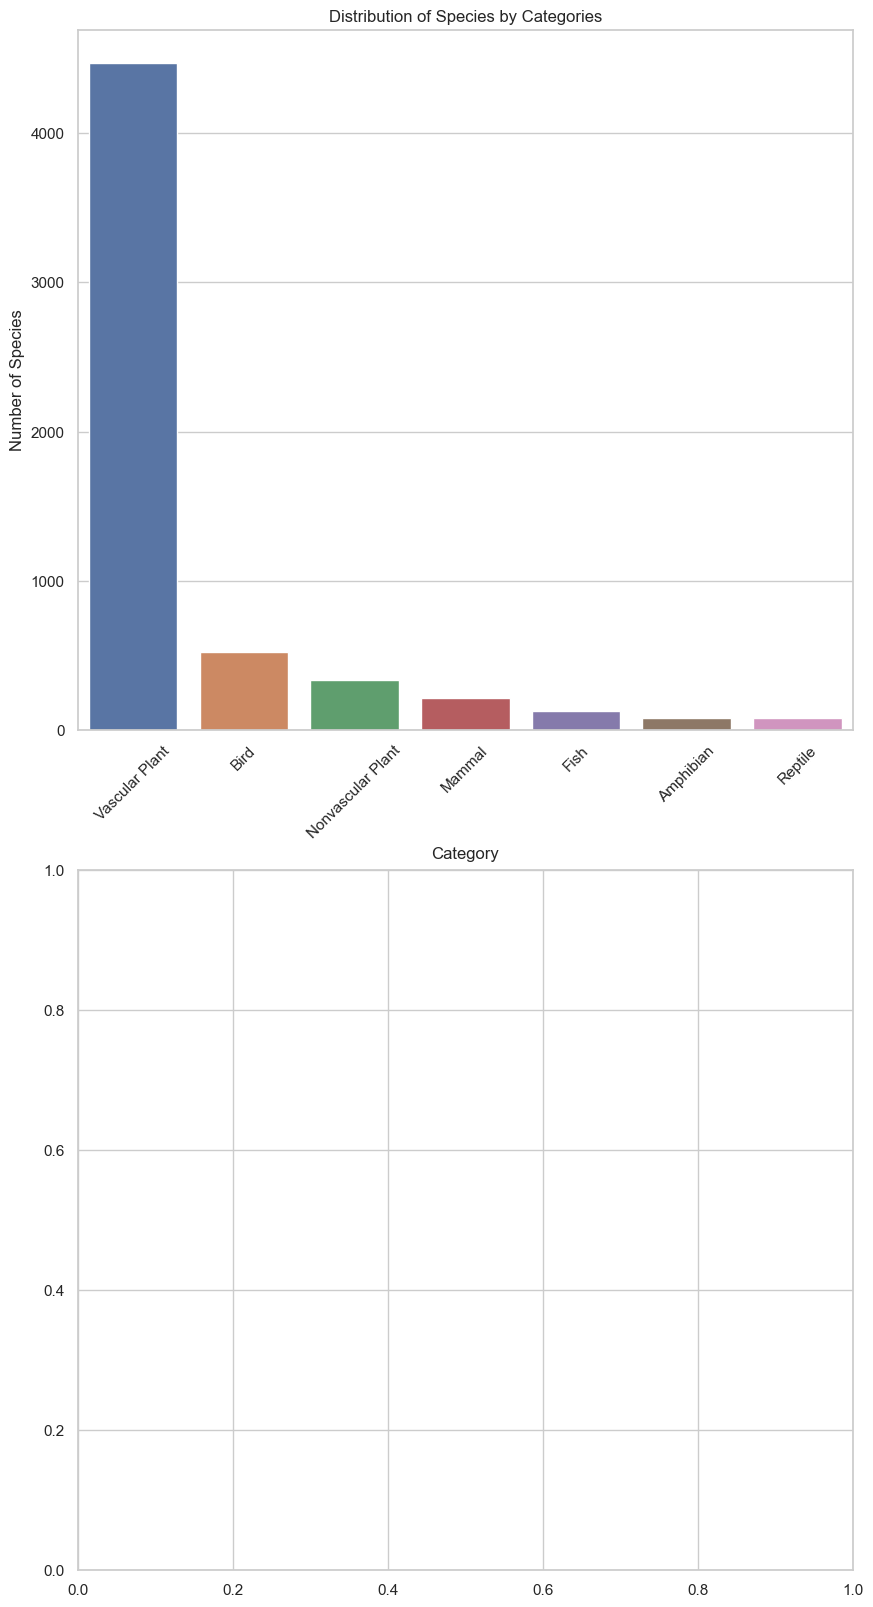

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

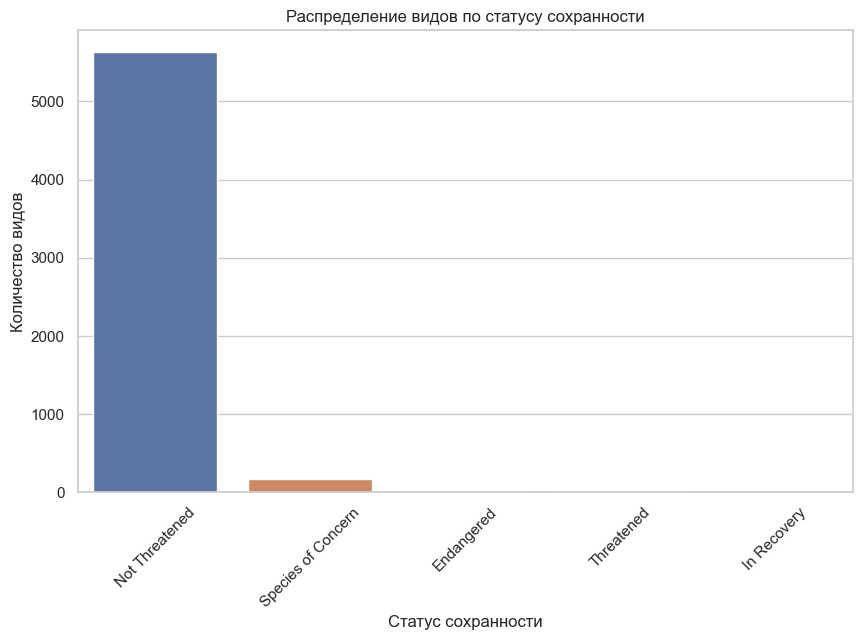

In [444]:
fig, axes = plt.subplots(2, 1, figsize=(10, 20))

# Visualization for 'category'
category_counts = species_info['category'].value_counts()
sns.barplot(ax=axes[0], x=category_counts.index, y=category_counts.values)
axes[0].set_title('Distribution of Species by Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Species')
axes[0].tick_params(axis='x', rotation=45)

'''
# Visualization for 'conservation_status'
conservation_status_counts = species_info['conservation_status'].value_counts()
sns.barplot(ax=axes[1], x=conservation_status_counts.index, y=conservation_status_counts.values)
axes[1].set_title('Distribution of Species by Conservation Status')
axes[1].set_xlabel('Conservation Status')
axes[1].set_ylabel('Number of Species')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(-1, 500) # Установка границ для оси Y от -1 до 1

plt.subplots_adjust(hspace=0.4)
'''
plt.show()
